# **Iowa Liquor Retail Sales Big Query Dataset Transformation & Analysis** (Underway...)
---

**The dataset used here includes statewide wholesale liquor purchases by Iowa (state in USA) retailers since January 1, 2012. It details orders from grocery stores, liquor stores, and convenience stores, including store locations, liquor brands, sizes, and quantities. The complete Iowa state's liquor retail sales raw dataset contains more than 40 million records and can be downloaded from [this Big Query link](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales).**

**For our data transformation and analysis activity, we've used here only the top 30000 records from the dataset.**

---

## **Importing the dataset**

In [392]:
import pandas as pd

In [393]:
df = pd.read_csv('/content/BQ_liquor_sales_data.csv')
pd.set_option('display.max_columns', df.shape[1])

In [394]:
df.head(3)

invoice_and_item_number        date  store_number  \
0        RINV-04433600124  2022-12-27          5102   
1        RINV-05415000024  2024-09-03          3549   
2        RINV-04846600166  2023-09-12          2560   

                          store_name                     address  \
0                     WILKIE LIQUORS           724 1ST STREET NE   
1               QUICKER LIQUOR STORE                1414 48TH ST   
2  HY-VEE FOOD STORE (1396) / MARION  3600 BUSINESS HWY 151 EAST   

           city zip_code                     store_location  county_number  \
0  MOUNT VERNON  52314.0          POINT(-91.41231 41.92012)            NaN   
1  FORT MADISON    52627          POINT(-91.37319 40.62423)            NaN   
2        MARION  52302.0  POINT(-91.572182976 42.037394006)            NaN   

  county   category                         category_name  vendor_number  \
0   LINN  1012100.0                     CANADIAN WHISKIES          260.0   
1    LEE  1092100.0  IMPORTED DISTILLED SPIRITS SPECIALTY          434.0   
2   LINN  1031100.0                       AMERICAN VODKAS          301.0   

            vendor_name  item_number      item_description  pack  \
0       DIAGEO AMERICAS        11297           CROWN ROYAL    12   
1             LUXCO INC        75087       JUAREZ GOLD DSS    12   
2  FIFTH GENERATION INC        38176  TITOS HANDMADE VODKA    12   

   bottle_volume_ml  state_bottle_cost  state_bottle_retail  bottles_sold  \
0              1000              19.99                29.99           -84   
1              1000               5.09                 7.64           -24   
2               750              10.00                15.00           -24   

   sale_dollars  volume_sold_liters  volume_sold_gallons  
0      -2519.16               -84.0               -22.19  
1       -183.36               -24.0                -6.34  
2       -360.00               -18.0                -4.75

In [395]:
# Resetting the index to start from 1
df.index += 1
df.head(2)

invoice_and_item_number        date  store_number            store_name  \
1        RINV-04433600124  2022-12-27          5102        WILKIE LIQUORS   
2        RINV-05415000024  2024-09-03          3549  QUICKER LIQUOR STORE   

             address          city zip_code             store_location  \
1  724 1ST STREET NE  MOUNT VERNON  52314.0  POINT(-91.41231 41.92012)   
2       1414 48TH ST  FORT MADISON    52627  POINT(-91.37319 40.62423)   

   county_number county   category                         category_name  \
1            NaN   LINN  1012100.0                     CANADIAN WHISKIES   
2            NaN    LEE  1092100.0  IMPORTED DISTILLED SPIRITS SPECIALTY   

   vendor_number      vendor_name  item_number item_description  pack  \
1          260.0  DIAGEO AMERICAS        11297      CROWN ROYAL    12   
2          434.0        LUXCO INC        75087  JUAREZ GOLD DSS    12   

   bottle_volume_ml  state_bottle_cost  state_bottle_retail  bottles_sold  \
1              1000              19.99                29.99           -84   
2              1000               5.09                 7.64           -24   

   sale_dollars  volume_sold_liters  volume_sold_gallons  
1      -2519.16               -84.0               -22.19  
2       -183.36               -24.0                -6.34

## **Data Transformation**

**First, let's create a custom function to shift in the frame those columns that'll be created anew:**

In [396]:
# main_col : col beside which new columns will be shifted
# mover_cols_list : newly created cols that need shifting beside main_col in L2R order
# df_main : main dataframe ('df')

def shift_columns(df_main, main_col, mover_cols_list):
  all_cols_list = df_main.columns.tolist()  # Listing current df columns
  main_col_pos  = df_main.columns.get_loc(main_col)   # '.get_loc()' returns 0-based index of col in df

  for col in mover_cols_list:
    all_cols_list.insert(main_col_pos + 1, all_cols_list.pop(all_cols_list.index(col)))
    main_col_pos += 1    # Shifting the index of col pos towards right in df

  return df_main[all_cols_list]


**Some methods for premiliary checks are as follows. One can run them one line at a time.**

In [397]:
'''Methods for preliminary checks'''

# df.shape              # o/p : (30000, 24)
# df.info()             # Shows df shape, col names, their non-null val count, & dtypes
# df.dtypes             # Col names & their dtypes
# df.describe()         # Statistical data about df's numeric cols
# df.axes               # List of row axis' and col axis' labels, in that order
# df.index              # List of labels in index col
# df.columns            # List of all col labels
# df.keys()             # List of all col labels
# df.index.name         # Label of index col
# df.index.names        # Labels of multi-col index, aka multi-index
# df.ndim               # No. of dimensions in df (2 here)
# df.memory_usage()     # Memory usage of each col in bytes
# df.select_dtypes(exclude = 'object')        # include/exclude cols of specified dtypes

'Methods for preliminary checks'

**Checking dtypes of columns**

In [398]:
[df.dtypes]  # Enclosing in brackets for a compact o/p

[invoice_and_item_number     object
 date                        object
 store_number                 int64
 store_name                  object
 address                     object
 city                        object
 zip_code                    object
 store_location              object
 county_number              float64
 county                      object
 category                   float64
 category_name               object
 vendor_number              float64
 vendor_name                 object
 item_number                  int64
 item_description            object
 pack                         int64
 bottle_volume_ml             int64
 state_bottle_cost          float64
 state_bottle_retail        float64
 bottles_sold                 int64
 sale_dollars               float64
 volume_sold_liters         float64
 volume_sold_gallons        float64
 dtype: object]

**Digging deeper into the dtype of each column:**

In [399]:
from pandas.api.types import infer_dtype
# for col in df.columns: print(col, ':', infer_dtype(df[col])) # Returns specific dtype of each col

**Resetting column names to title-case:**

In [400]:
df.columns = ['_'.join(word.title() for word in col.split('_')) for col in df.columns]
df.columns[:3]

Index(['Invoice_And_Item_Number', 'Date', 'Store_Number'], dtype='object')

In [401]:
df.rename(columns = {'Invoice_And_Item_Number' : 'Bill_Number', 'Date' : 'Order_Date'}, inplace = True)
df.columns[0:2]

Index(['Bill_Number', 'Order_Date'], dtype='object')

**The** 'date' **column's dtype should be of** datetime **type so that we can extract various date components later on.**

In [402]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = '%Y-%m-%d')
df['Order_Date'].dtype  # dtype('<M8[ns]')

dtype('<M8[ns]')

**Extracting date components from** 'Order_Date' **column into separate columns & shifting them beside** Order_Date **column:**

In [403]:
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Quarter'] = df['Order_Date'].dt.quarter

# df.columns[-4:]  # Returns list of right-most 4 cols in frame

# Shifting cols (calling custom fn created at the top of this section)
df = shift_columns(df, 'Order_Date', df.columns[-4:])

pd.set_option('display.max_columns', df.shape[1])
df.head(1)

Bill_Number Order_Date  Order_Year  Order_Month  Order_Day  \
1  RINV-04433600124 2022-12-27        2022           12         27   

   Order_Quarter  Store_Number      Store_Name            Address  \
1              4          5102  WILKIE LIQUORS  724 1ST STREET NE   

           City Zip_Code             Store_Location  County_Number County  \
1  MOUNT VERNON  52314.0  POINT(-91.41231 41.92012)            NaN   LINN   

    Category      Category_Name  Vendor_Number      Vendor_Name  Item_Number  \
1  1012100.0  CANADIAN WHISKIES          260.0  DIAGEO AMERICAS        11297   

  Item_Description  Pack  Bottle_Volume_Ml  State_Bottle_Cost  \
1      CROWN ROYAL    12              1000              19.99   

   State_Bottle_Retail  Bottles_Sold  Sale_Dollars  Volume_Sold_Liters  \
1                29.99           -84      -2519.16               -84.0   

   Volume_Sold_Gallons  
1               -22.19

**Dropping unwanted columns**

In [404]:
df.drop(columns = ['Address', 'Category', 'Vendor_Number', 'Volume_Sold_Gallons'], inplace = True)
df.head(1)

Bill_Number Order_Date  Order_Year  Order_Month  Order_Day  \
1  RINV-04433600124 2022-12-27        2022           12         27   

   Order_Quarter  Store_Number      Store_Name          City Zip_Code  \
1              4          5102  WILKIE LIQUORS  MOUNT VERNON  52314.0   

              Store_Location  County_Number County      Category_Name  \
1  POINT(-91.41231 41.92012)            NaN   LINN  CANADIAN WHISKIES   

       Vendor_Name  Item_Number Item_Description  Pack  Bottle_Volume_Ml  \
1  DIAGEO AMERICAS        11297      CROWN ROYAL    12              1000   

   State_Bottle_Cost  State_Bottle_Retail  Bottles_Sold  Sale_Dollars  \
1              19.99                29.99           -84      -2519.16   

   Volume_Sold_Liters  
1               -84.0

**Checking the number of nulls in each column:**

In [405]:
[df.isnull().sum()]  # Enclosing in brackets for a compact o/p

[Bill_Number               0
 Order_Date                0
 Order_Year                0
 Order_Month               0
 Order_Day                 0
 Order_Quarter             0
 Store_Number              0
 Store_Name                0
 City                    114
 Zip_Code                114
 Store_Location         2170
 County_Number          8362
 County                  190
 Category_Name            22
 Vendor_Name               0
 Item_Number               0
 Item_Description          0
 Pack                      0
 Bottle_Volume_Ml          0
 State_Bottle_Cost         1
 State_Bottle_Retail       1
 Bottles_Sold              0
 Sale_Dollars              1
 Volume_Sold_Liters        0
 dtype: int64]

### **Fixing NaNs in** County **column**

City **has 114 nulls,** County **has 190 nulls i.e. there are 76 rows having non-null values in** City **but corresponding** County **values as null. Those 76 nulls in** County **can be fixed by using the list of Iowa cities & their counties, as described ahead:**

In [406]:
# 'City' is not-null but 'County' is null
df[~(df['City'].isnull()) & (df['County'].isnull())][['City', 'County']]

City County
8812   MASON CITY    NaN
8891    INDIANOLA    NaN
9733    MUSCATINE    NaN
10048  DES MOINES    NaN
10333  DES MOINES    NaN
...           ...    ...
28490   IOWA CITY    NaN
28563  DES MOINES    NaN
28772     BELMOND    NaN
29233    ROCKWELL    NaN
29260  DES MOINES    NaN

[76 rows x 2 columns]

**We have a [PDF of tabular data](https://sos.iowa.gov/business/pdf/inccities.pdf) containing Iowa cities and their counties. We'll use that PDF's content as done ahead:**

In [446]:
!pip install "camelot-py[base]" # Install 'camelot-py' with base dependencies to extract tables from PDFs

In [408]:
import camelot

tables = camelot.read_pdf('/content/iowaCityCounty.pdf', pages = '1-19') # Extract tables from all 19 pages

print(f"Total tables extracted: {tables.n}") # Check no. of tables were detected

dfs = [table.df for table in tables]  # Convert each table to DataFrame
city_county_df = pd.concat(dfs, ignore_index=True)  # Merge all tables

city_county_df.head() # Show the first few rows


Total tables extracted: 19


0                      1       2
0      Name  Date of Incorporation  County
1    Ackley        August 28, 1869  Hardin
2  Ackworth            May 9, 1881  Warren
3     Adair      February 23, 1884   Adair
4      Adel          June 27, 1877  Dallas

**Promoting first row to column headers:**

In [409]:
city_county_df.columns = city_county_df.iloc[0]  # Set first row as column headers
city_county_df.head(3)

0      Name  Date of Incorporation  County
0      Name  Date of Incorporation  County
1    Ackley        August 28, 1869  Hardin
2  Ackworth            May 9, 1881  Warren

**Removing 1st row from above o/p:**

In [410]:
city_county_df = city_county_df[1:].reset_index(drop=True)
city_county_df.head(2)

0      Name Date of Incorporation  County
0    Ackley       August 28, 1869  Hardin
1  Ackworth           May 9, 1881  Warren

**Dropping the redundant column** Date of Incorporation, **renaming remaining columns & changing all values to upper case:**

In [411]:
city_county_df = city_county_df.drop(columns = 'Date of Incorporation')  # Dropping unwanted column
city_county_df = city_county_df.rename(columns = {'Name' : 'CityName', 'County' : 'CityCounty'})
city_county_df = city_county_df.map(lambda x: x.upper() if isinstance(x, str) else x)  # All vals in frame to upper case

city_county_df.head(2)

0  CityName CityCounty
0    ACKLEY     HARDIN
1  ACKWORTH     WARREN

**Convert** 'city_county_df' **into dictionary, using** 'CityName' **values as keys and** 'CityCounty' **values as keys' values.**

In [412]:
city_county_dict = dict(zip(city_county_df['CityName'], city_county_df['CityCounty']))

list(city_county_dict.items())[:3]  # Glancing at first 3 city-county pairs of dict

[('ACKLEY', 'HARDIN'), ('ACKWORTH', 'WARREN'), ('ADAIR', 'ADAIR')]

**Use** 'city_county_dict' **to fill NaN values in** df['County'].

In [413]:
df['County'] = df['County'].fillna(df['City'].map(city_county_dict))
# Every 'City' is looked up in the keys of 'city_county_dict' and a matching-value is returned to replace NaN in 'County'

In [414]:
[df[['City', 'County']].isnull().sum()]  # o/p shows there's 1 non-NaN City val which is missing County val

[City      114
 County    115
 dtype: int64]

**Let's find out the** City **which is non-NaN but having** County **val NaN:**

In [415]:
df[~(df['City'].isnull()) & (df['County'].isnull())]['City'].unique()

array(['DEWITT'], dtype=object)

**Google shows CLINTON to be county of DEWITT. So, we'll add** DEWITT:CLINTON **to dictionary** city_county_dict:

In [416]:
city_county_dict['DEWITT'] = 'CLINTON'

**Applying** city_county_dict **once again to** df['County']:

In [417]:
df['County'] =  df['County'].fillna(df['City'].map(city_county_dict))

In [418]:
[df[['City', 'County']].isnull().sum()]  # o/p shows wherever city is NaN, its county is also NaN which makes sense.

[City      114
 County    114
 dtype: int64]

### **Fixing NaNs in** County_Number **column**

**We had to download .CSV file of Iowa county's and their numbers [from this website](https://www.downloadexcelfiles.com/us_en/download-excel-file-list-counties-iowa#gsc.tab=0). The redundant columns from that file were dropped and all county names were changed to uppercase.**

**That file will be imported here, converted to dictionary and then its values will be mapped on NaNs in** County_Number **col of df.**

In [419]:
df_county_numbers = pd.read_csv('/content/iowaCountyNumbers.csv')
county_number_dict = dict(zip(df_county_numbers['County'], df_county_numbers['CountyNumber']))

In [420]:
list(county_number_dict.items())[:3]  # Glancing at the county-countyNumber pairs

[('ADAIR', 1), ('ADAMS', 2), ('ALLAMAKEE', 3)]

In [421]:
# Every 'County' is looked up in the keys of 'county_number_dict' and a matching-value is returned to replace NaN in 'County_Number'
df['County_Number'] = df['County_Number'].fillna(df['County'].map(county_number_dict))

In [422]:
# Checking the no. of nulls once again in selected cols:
[df[['City', 'County', 'County_Number']].isnull().sum()]

[City             114
 County           114
 County_Number    762
 dtype: int64]

**Above o/p indicates there are 762-114 = 648 values in** County **that are not NaN but since they are not present as keys in dictionary** county_number_dict, **their corresponding** County_Number values **still remain NaN. Let us extract those unique** County **values.**

In [423]:
df[~(df['County'].isnull()) & (df['County_Number'].isnull())]['County'].unique()

array(['BUENA VISTA', 'BLACK HAWK', 'CERRO GORDO'], dtype=object)

In [424]:
county_add = {'BUENA VISTA' : 11, 'BLACK HAWK' : 7, 'CERRO GORDO' : 17}  # Creating new dict to add missing county & their numbers

In [425]:
# Extend dictionary 'county_number_dict' by adding dictionary 'county_add'

county_number_dict.update(county_add)

**Once again, updating col** County_Number **in** df **using updated** county_number_dict.

In [426]:
df['County_Number'] = df['County_Number'].fillna(df['County'].map(county_number_dict))

**Now, we can check if** City, County **and** County_Number **have same number of nulls.**

In [427]:
# Checking the no. of nulls once again in selected cols:
[df[['City', 'County', 'County_Number']].isnull().sum()]  # Since city is unknown, so county & county_number will also be unknown

[City             114
 County           114
 County_Number    114
 dtype: int64]

### **Identifying duplicated records:**

In [428]:
df[df.duplicated()].index  # Index list in o/p is empty implying there are no duplicated records

Index([], dtype='int64')

### **Identifying nulls in rows:**

In [429]:
df.isnull().sum(axis=1).max()  # Max no. of nulls in a ROW is 5 in 24 col i.e. ~21% of data in the row is absent.

5

In [430]:
rows_nulls_indexes = df.loc[df.isnull().sum(axis=1) == 5].index  # Extracting the indices of ROWS having no. of nulls = 5 in them
rows_nulls_indexes

Index([ 3466,  6231,  6359,  6525,  6669,  6945,  6946,  7709,  8525,  8677,
       ...
       27579, 27653, 27676, 27904, 27928, 28736, 28824, 28924, 28926, 29490],
      dtype='int64', length=114)

**Rows at these ↑ indices have ~21% of the data absent and can be dropped from dataset without much affecting our analysis later on.**

In [431]:
df.drop(rows_nulls_indexes, inplace = True)

In [432]:
[df.isnull().sum()]

[Bill_Number               0
 Order_Date                0
 Order_Year                0
 Order_Month               0
 Order_Day                 0
 Order_Quarter             0
 Store_Number              0
 Store_Name                0
 City                      0
 Zip_Code                  0
 Store_Location         2056
 County_Number             0
 County                    0
 Category_Name            22
 Vendor_Name               0
 Item_Number               0
 Item_Description          0
 Pack                      0
 Bottle_Volume_Ml          0
 State_Bottle_Cost         1
 State_Bottle_Retail       1
 Bottles_Sold              0
 Sale_Dollars              1
 Volume_Sold_Liters        0
 dtype: int64]

**Above o/p indicates** Store_Location **still has 2056 values as unknown. Nothing can be done about it.**

In [433]:
df # Checking how the data looks at this point

Bill_Number Order_Date  Order_Year  Order_Month  Order_Day  \
1      RINV-04433600124 2022-12-27        2022           12         27   
2      RINV-05415000024 2024-09-03        2024            9          3   
3      RINV-04846600166 2023-09-12        2023            9         12   
4      RINV-04681700152 2023-06-09        2023            6          9   
5      RINV-04746500069 2023-07-12        2023            7         12   
...                 ...        ...         ...          ...        ...   
29996   INV-17795000016 2019-02-26        2019            2         26   
29997   INV-16215200042 2018-12-10        2018           12         10   
29998   INV-23204900050 2019-11-13        2019           11         13   
29999   INV-62846300027 2023-10-02        2023           10          2   
30000   INV-33892700007 2021-01-29        2021            1         29   

       Order_Quarter  Store_Number  \
1                  4          5102   
2                  3          3549   
3                  3          2560   
4                  2          2663   
5                  3          4346   
...              ...           ...   
29996              1          4642   
29997              4          2641   
29998              4          2648   
29999              4          5347   
30000              1          5908   

                                          Store_Name             City  \
1                                     WILKIE LIQUORS     MOUNT VERNON   
2                               QUICKER LIQUOR STORE     FORT MADISON   
3                  HY-VEE FOOD STORE (1396) / MARION           MARION   
4                      HY-VEE FOOD STORE / URBANDALE        URBANDALE   
5                                     ROY'S FOODLAND       SHELLSBURG   
...                                              ...              ...   
29996  LIQUOR AND TOBACCO OUTLET / UNIV AVE WATERLOO         WATERLOO   
29997              HY-VEE DRUGSTORE / COUNCIL BLUFFS   COUNCIL BLUFFS   
29998                                HY-VEE #4 / WDM  WEST DES MOINES   
29999                      KUM & GO #1097 / 50TH WDM  WEST DES MOINES   
30000           NEIGHBORHOOD TOBACCO OUTLET / MARION           MARION   

      Zip_Code                     Store_Location  County_Number  \
1      52314.0          POINT(-91.41231 41.92012)           57.0   
2        52627          POINT(-91.37319 40.62423)           56.0   
3      52302.0  POINT(-91.572182976 42.037394006)           57.0   
4      50322.0  POINT(-93.738906371 41.630504742)           77.0   
5      52332.0  POINT(-91.868949035 42.094179011)            6.0   
...        ...                                ...            ...   
29996    50701        POINT(-92.382928 42.498321)            7.0   
29997    51501        POINT(-95.855054 41.261673)           78.0   
29998  50265.0        POINT(-93.773557 41.561197)           77.0   
29999  50265.0  POINT(-93.771377026 41.572201984)           77.0   
30000  52302.0        POINT(-91.585363 42.033257)           57.0   

              County                         Category_Name  \
1               LINN                     CANADIAN WHISKIES   
2                LEE  IMPORTED DISTILLED SPIRITS SPECIALTY   
3               LINN                       AMERICAN VODKAS   
4               POLK  AMERICAN DISTILLED SPIRITS SPECIALTY   
5             BENTON                     CANADIAN WHISKIES   
...              ...                                   ...   
29996     BLACK HAWK                             WHITE RUM   
29997  POTTAWATTAMIE                             WHITE RUM   
29998           POLK                             WHITE RUM   
29999           POLK                             WHITE RUM   
30000           LINN                          FLAVORED RUM   

                Vendor_Name  Item_Number                 Item_Description  \
1           DIAGEO AMERICAS        11297                      CROWN ROYAL   
2                 LUXCO INC        75087                  JUAREZ GOLD DSS

**Last index and last line of above o/p indicates index col has to be reset:**

In [434]:
df.reset_index(drop=True, inplace=True)
df.index += 1 # Setting index to start from 1

In [435]:
df

Bill_Number Order_Date  Order_Year  Order_Month  Order_Day  \
1      RINV-04433600124 2022-12-27        2022           12         27   
2      RINV-05415000024 2024-09-03        2024            9          3   
3      RINV-04846600166 2023-09-12        2023            9         12   
4      RINV-04681700152 2023-06-09        2023            6          9   
5      RINV-04746500069 2023-07-12        2023            7         12   
...                 ...        ...         ...          ...        ...   
29882   INV-17795000016 2019-02-26        2019            2         26   
29883   INV-16215200042 2018-12-10        2018           12         10   
29884   INV-23204900050 2019-11-13        2019           11         13   
29885   INV-62846300027 2023-10-02        2023           10          2   
29886   INV-33892700007 2021-01-29        2021            1         29   

       Order_Quarter  Store_Number  \
1                  4          5102   
2                  3          3549   
3                  3          2560   
4                  2          2663   
5                  3          4346   
...              ...           ...   
29882              1          4642   
29883              4          2641   
29884              4          2648   
29885              4          5347   
29886              1          5908   

                                          Store_Name             City  \
1                                     WILKIE LIQUORS     MOUNT VERNON   
2                               QUICKER LIQUOR STORE     FORT MADISON   
3                  HY-VEE FOOD STORE (1396) / MARION           MARION   
4                      HY-VEE FOOD STORE / URBANDALE        URBANDALE   
5                                     ROY'S FOODLAND       SHELLSBURG   
...                                              ...              ...   
29882  LIQUOR AND TOBACCO OUTLET / UNIV AVE WATERLOO         WATERLOO   
29883              HY-VEE DRUGSTORE / COUNCIL BLUFFS   COUNCIL BLUFFS   
29884                                HY-VEE #4 / WDM  WEST DES MOINES   
29885                      KUM & GO #1097 / 50TH WDM  WEST DES MOINES   
29886           NEIGHBORHOOD TOBACCO OUTLET / MARION           MARION   

      Zip_Code                     Store_Location  County_Number  \
1      52314.0          POINT(-91.41231 41.92012)           57.0   
2        52627          POINT(-91.37319 40.62423)           56.0   
3      52302.0  POINT(-91.572182976 42.037394006)           57.0   
4      50322.0  POINT(-93.738906371 41.630504742)           77.0   
5      52332.0  POINT(-91.868949035 42.094179011)            6.0   
...        ...                                ...            ...   
29882    50701        POINT(-92.382928 42.498321)            7.0   
29883    51501        POINT(-95.855054 41.261673)           78.0   
29884  50265.0        POINT(-93.773557 41.561197)           77.0   
29885  50265.0  POINT(-93.771377026 41.572201984)           77.0   
29886  52302.0        POINT(-91.585363 42.033257)           57.0   

              County                         Category_Name  \
1               LINN                     CANADIAN WHISKIES   
2                LEE  IMPORTED DISTILLED SPIRITS SPECIALTY   
3               LINN                       AMERICAN VODKAS   
4               POLK  AMERICAN DISTILLED SPIRITS SPECIALTY   
5             BENTON                     CANADIAN WHISKIES   
...              ...                                   ...   
29882     BLACK HAWK                             WHITE RUM   
29883  POTTAWATTAMIE                             WHITE RUM   
29884           POLK                             WHITE RUM   
29885           POLK                             WHITE RUM   
29886           LINN                          FLAVORED RUM   

                Vendor_Name  Item_Number                 Item_Description  \
1           DIAGEO AMERICAS        11297                      CROWN ROYAL   
2                 LUXCO INC        75087                  JUAREZ GOLD DSS

**Downloading the cleaned file:**

In [436]:
df.to_csv('BQ_liquor_sales_cleaned.csv', index=False)

### **Plotting geographic points on Iowa map**

In [437]:
!pip install geopandas
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces.zip
!unzip ne_110m_admin_1_states_provinces.zip

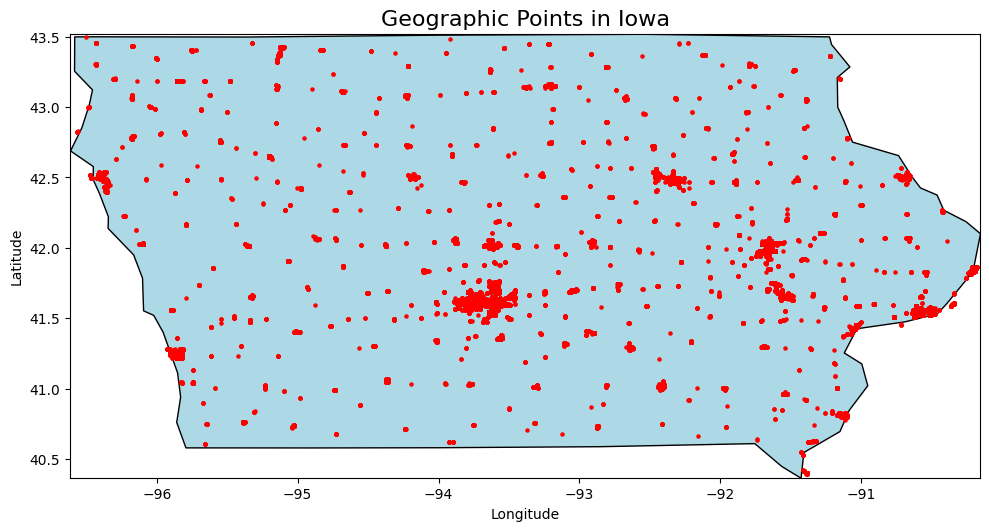

In [445]:
import geopandas as gpd, matplotlib.pyplot as plt
from shapely.geometry import Point

frame = pd.read_csv('/content/BQ_liquor_sales_cleaned.csv')

df = frame.copy(deep = True)

df['Store_Location'] = df['Store_Location'].str.strip('POINT()')
df[['longitude', 'latitude']] = df['Store_Location'].str.split(' ', expand=True)
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

data = {'latitude': df['latitude'], 'longitude': df['longitude']}
df_coordinates = pd.DataFrame(data)

df_coordinates['geometry'] = df_coordinates.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_coordinates, geometry = 'geometry')

# Load the states shapefile
states = gpd.read_file("ne_110m_admin_1_states_provinces.shp")

# Filter for Iowa
iowa = states[states.name == "Iowa"]

# Define the extent for zooming
minx, miny, maxx, maxy = iowa.total_bounds # Use Iowa's boundaries for initial zoom

# Plot the map of Iowa
fig, ax = plt.subplots(figsize = (10, 10))  # Adjust figure size as needed
iowa.plot(ax = ax, color='lightblue', edgecolor='black')

gdf.plot(ax = ax, color='red', markersize = 5)

ax.set_xlim(minx, maxx)  # Set x-axis limits
ax.set_ylim(miny, maxy)  # Set y-axis limits

# Set title and labels
ax.set_title("Geographic Points in Iowa", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()

###---

**Main intent of this work was to demonstrate how NaNs are to be handled when their rows can't simply be dropped. Let's end this work by answering a data analysis question.**

### Filter all records of whisky (or whiskey or scotch) sales post Jan 2024.

In [444]:
def check_whisky(whisky_name):    # Fn to check if val in 'item_description' col contains listed substrings
  return any(word in whisky_name for word in ['WHISKY', 'WHISKEY', 'SCOTCH', 'MALT', 'BOURBON'])

df = pd.read_csv('/content/BQ_liquor_sales_cleaned.csv', parse_dates = ['Order_Date'], date_format = '%Y-%m-%d')

ans = df[df['Item_Description'].apply(check_whisky) & (df['Order_Date'] > 'Jan-2024')]
ans[['Order_Date', 'Item_Description', 'Volume_Sold_Liters', 'Sale_Dollars']]

Order_Date                        Item_Description  Volume_Sold_Liters  \
11    2024-01-17               FIREBALL CINNAMON WHISKEY               -9.60   
25    2024-10-04               FIREBALL CINNAMON WHISKEY               -3.00   
65    2024-07-01  FIREBALL CINNAMON WHISKEY PARTY BUCKET                0.05   
66    2024-03-25  FIREBALL CINNAMON WHISKEY PARTY BUCKET                0.05   
70    2025-01-29  FIREBALL CINNAMON WHISKEY PARTY BUCKET                0.05   
...          ...                                     ...                 ...   
28716 2024-04-03                   CLAN MACGREGOR SCOTCH                1.00   
29235 2024-06-26         SKREWBALL PEANUT BUTTER WHISKEY                1.00   
29498 2024-04-11                     CANADIAN LTD WHISKY                1.12   
29569 2024-02-26                1792 SMALL BATCH BOURBON                1.12   
29570 2024-11-11                1792 SMALL BATCH BOURBON                1.12   

       Sale_Dollars  
11          -144.00  
25           -54.00  
65            77.40  
66            77.40  
70            78.60  
...             ...  
28716          9.99  
29235         28.47  
29498         10.14  
29569         28.14  
29570         28.14  

[513 rows x 4 columns]

---
**KEEPING ALL DATA LOADING & TRANSFORMATION LOGIC IN ONE CELL FOR QUICK RUN IN CASE OF ABRUPT SESSION TERMINATION**

In [441]:
# import pandas as pd

# # -------------- Creating custom fn to shift columns around in frame -------------------------
# # main_col : col beside which new columns will be shifted
# # mover_cols_list : newly created cols that need shifting beside main_col in L2R order
# # df_main : main dataframe ('df')

# def shift_columns(df_main, main_col, mover_cols_list):
#   all_cols_list = df_main.columns.tolist()  # Listing current df columns
#   main_col_pos  = df_main.columns.get_loc(main_col)   # '.get_loc()' returns 0-based index of col in df

#   for col in mover_cols_list:
#     all_cols_list.insert(main_col_pos + 1, all_cols_list.pop(all_cols_list.index(col)))
#     main_col_pos += 1    # Shifting the index of col pos towards right in df

#   return df_main[all_cols_list]
# # ---------------------------------------------------------------------------------------------

# df = pd.read_csv('/content/BQ_liquor_sales_data.csv')
# pd.set_option('display.max_columns', df.shape[1])

# df.index += 1 # Resetting the index to start from 1

# df.columns = ['_'.join(word.title() for word in col.split('_')) for col in df.columns] # Setting column names to title-case
# df.rename(columns = {'Invoice_And_Item_Number' : 'Bill_Number', 'Date' : 'Order_Date'}, inplace = True)  # Renaming columns

# df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = '%Y-%m-%d')  # Changing dtype
# # df['Order_Date'].dtype  # dtype('<M8[ns]')

# # Extracting date component's into new cols
# df['Order_Year'] = df['Order_Date'].dt.year
# df['Order_Month'] = df['Order_Date'].dt.month
# df['Order_Day'] = df['Order_Date'].dt.day
# df['Order_Quarter'] = df['Order_Date'].dt.quarter
# df = shift_columns(df, 'Order_Date', df.columns[-4:])  # Shifting the newly creating columns

# df.drop(columns = ['Address', 'Category', 'Vendor_Number', 'Volume_Sold_Gallons'], inplace = True) # Dropping cols

# pd.set_option('display.max_columns', df.shape[0])
# df.head(2)